In [1]:
from __future__ import print_function, division
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Galaxy Shape Demo

In [2]:
from halotools.sim_manager import CachedHaloCatalog
halocat = CachedHaloCatalog(simname='bolshoi', halo_finder='rockstar', redshift=0, version_name='halotools_v0p4')

In [3]:
from halotools.empirical_models import HodModelFactory

# define the central occupatoion model
from halotools.empirical_models import TrivialPhaseSpace, Cacciato09Cens
cens_occ_model =  Cacciato09Cens(prim_haloprop_key = 'halo_mvir')
cens_prof_model = TrivialPhaseSpace()

# define the satellite occupation model
from halotools.empirical_models import Cacciato09Sats
from halotools.empirical_models import NFWPhaseSpace, SubhaloPhaseSpace
sats_occ_model =  Cacciato09Sats(prim_haloprop_key = 'halo_mvir')
sats_prof_model = NFWPhaseSpace()

# define quenching model
from halotools.empirical_models import ZuMandelbaum16QuenchingCens, ZuMandelbaum16QuenchingSats
cens_quenching_model = ZuMandelbaum16QuenchingCens(prim_haloprop_key = 'halo_mvir')
sats_quenching_model = ZuMandelbaum16QuenchingSats(prim_haloprop_key = 'halo_mvir')

# define shape model
from shape_model_componenets import PS08Shapes, GalaxyShapes
#cens_shape_model = PS08Shapes(gal_type = 'centrals',   sample='all', galaxy_type='elliptical')
#sats_shape_model = PS08Shapes(gal_type = 'satellites', sample='all', galaxy_type='elliptical')
quenched_cens_shape_model    = GalaxyShapes(gal_type = 'centrals',   quiescent=True)
starforming_cens_shape_model = GalaxyShapes(gal_type = 'centrals',   quiescent=False)
quenched_sats_shape_model    = GalaxyShapes(gal_type = 'satellites', quiescent=True)
starforming_sats_shape_model = GalaxyShapes(gal_type = 'satellites', quiescent=False)

# define alignment model
from intrinsic_alignments.ia_models.ia_model_components import RandomAlignment
central_orientation_model = RandomAlignment(gal_type='centrals')
satellite_orientation_model = RandomAlignment(gal_type='satellites')

# projected shapes
from shape_model_componenets import ProjectedShape
central_proj_shapes_model = ProjectedShape('centrals')
satellite_proj_shapes_model = ProjectedShape('satellites')

# combine model components
model_instance = HodModelFactory(centrals_occupation = cens_occ_model,
                                 centrals_profile = cens_prof_model,
                                 satellites_occupation = sats_occ_model,
                                 satellites_profile = sats_prof_model,
                                 centrals_quenching = cens_quenching_model,
                                 satellites_quenching = sats_quenching_model,
                                 centrals_quenched_galaxy_shape = quenched_cens_shape_model,
                                 centrals_starforming_galaxy_shape = starforming_cens_shape_model,
                                 satellites_quenched_galaxy_shape = quenched_sats_shape_model,
                                 satellites_starforming_galaxy_shape = starforming_sats_shape_model,
                                 centrals_orientation = central_orientation_model,
                                 satellites_orientation = satellite_orientation_model,
                                 centrals_proj_shapes = central_proj_shapes_model,
                                 satellites_proj_shapes = satellite_proj_shapes_model,
                                 model_feature_calling_sequence = (
                                 'centrals_occupation',
                                 'centrals_profile',
                                 'satellites_occupation',
                                 'satellites_profile',
                                 'centrals_quenching',
                                 'satellites_quenching',
                                 'centrals_quenched_galaxy_shape',
                                 'centrals_starforming_galaxy_shape',
                                 'satellites_quenched_galaxy_shape',
                                 'satellites_starforming_galaxy_shape',
                                 'centrals_orientation',
                                 'satellites_orientation',
                                 'centrals_proj_shapes',
                                 'satellites_proj_shapes')
                                )

/Users/duncan/Code/halotools/halotools/empirical_models/factories/hod_model_factory.py:741: UserWarning: 

The param_dict key log_L_0 appears in more than one component model.
This is permissible, but if you are seeing this message you should be sure you understand it.
In particular, double-check that this parameter does not have conflicting meanings across components.

If you do not wish to see this message every time you instantiate, 
simply attach a _suppress_repeated_param_warning attribute 
to any of your component models and set this variable to ``True``.

  warn(msg % key)
/Users/duncan/Code/halotools/halotools/empirical_models/factories/hod_model_factory.py:741: UserWarning: 

The param_dict key gamma_1 appears in more than one component model.
This is permissible, but if you are seeing this message you should be sure you understand it.
In particular, double-check that this parameter does not have conflicting meanings across components.

If you do not wish to see this message e

In [7]:
model_instance.

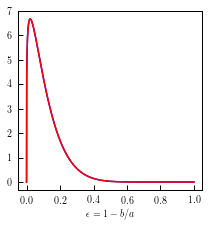

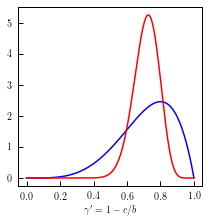

In [4]:
# examine shape distribution model

x = np.linspace(0,1,1000)
epsilon_1 = starforming_cens_shape_model.epsilon_pdf(x)
gamma_prime_1 = starforming_cens_shape_model.gamma_prime_pdf(x)
epsilon_2 = quenched_cens_shape_model.epsilon_pdf(x)
gamma_prime_2 = quenched_cens_shape_model.gamma_prime_pdf(x)



plt.figure(figsize=(3.3,3.3))
plt.plot(x, epsilon_1, color='blue')
plt.plot(x, epsilon_2, color='red')
plt.xlabel(r'$\epsilon = 1-b/a$')
plt.show()

plt.figure(figsize=(3.3,3.3))
plt.plot(x, gamma_prime_1, color='blue')
plt.plot(x, gamma_prime_2, color='red')
plt.xlabel(r'$\gamma^{\prime} = 1-c/b$')
plt.show()

In [5]:
# populate mock catalog
model_instance.populate_mock(halocat)
print("number of galaxies: ", len(model_instance.mock.galaxy_table))

mock = model_instance.mock.galaxy_table

False 21889 quiescent
False 21889 quiescent
False 21889 quiescent
False 21889 quiescent
False 3023 quiescent
False 3023 quiescent
False 3023 quiescent
False 3023 quiescent
number of galaxies:  79714


/Users/duncan/Code/halotools/halotools/empirical_models/phase_space_models/analytic_models/monte_carlo_helpers.py:205: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  self.rad_prof_func_table_indices[digitized_param_list]
/Users/duncan/Code/halotools/halotools/empirical_models/phase_space_models/analytic_models/monte_carlo_helpers.py:522: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  self.rad_prof_func_table_indices[digitized_param_list]


In [6]:
# calculate the distribution of shapes
bins = np.linspace(0,1,100)

# 3D axis ratios
counts_1 = np.histogram(mock['galaxy_b_to_a'], bins=bins)[0]
counts_2 = np.histogram(mock['galaxy_c_to_a'], bins=bins)[0]

# 2D elipticity
e = 1 - mock['galaxy_projected_b_to_a']
counts_3 = np.histogram(e, bins=bins)[0]
counts_3 = counts_3/np.sum(counts_3)/np.diff(bins)

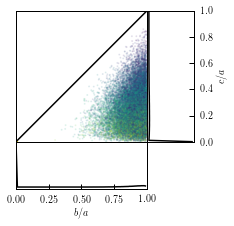

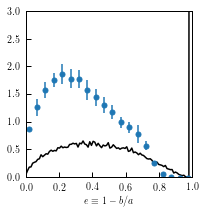

In [7]:
# 3D shape distribution
fig = plt.figure(figsize=(3.3,3.3))

# main panel
rect = 0.2-0.1, 0.35, 0.55, 0.55  # left, bottom, width, height
ax = fig.add_axes(rect)
ax.xaxis.set_visible(False)
ax.yaxis.set_visible(False)
ax.scatter(mock['galaxy_b_to_a'], mock['galaxy_c_to_a'], alpha=0.1, s=1, c=e, rasterized=True)
ax.plot([0,1],[0,1], '-', color='black')
ax.set_xlim([0,1])
ax.set_ylim([0,1])

# lower panel
rect = 0.2-0.1,0.15,0.55,0.2  # left, bottom, width, height
ax = fig.add_axes(rect)
ax.yaxis.set_visible(False)
ax.set_xlim([0,1])
ax.plot(bins[:-1], counts_1, color='black')
ax.set_xlabel(r'$b/a$')

# right panel
rect = 0.75-0.1,0.35,0.2,0.55  # left, bottom, width, height
ax = fig.add_axes(rect)
ax.xaxis.set_visible(False)
ax.set_ylim([0,1])
ax.yaxis.tick_right()
ax.yaxis.set_label_position('right')
ax.plot(counts_2, bins[:-1], color='black')
ax.set_ylabel(r'$c/a$')

plt.show()

# load PS08 data
from astropy.table import Table
t = Table.read('../data/PS08/figure_4.dat', format='ascii')
x = 1-t['b/a']
y = t['normalized_frequency']
err = np.fabs(t['error_+'] - t['error_-'])


# 2D shape distribution
fig = plt.figure(figsize=(3.3,3.3))

# main panel
rect = 0.2, 0.2, 0.7, 0.7  # left, bottom, width, height
ax = fig.add_axes(rect)
ax.plot(bins[:-1], counts_3, color='black')
ax.errorbar(x, y, yerr=err, fmt='o', ms=5)
ax.set_xlim([0,1])
ax.set_ylim([0,3])
ax.set_xlabel(r'$e \equiv 1 - b/a$')

plt.show()

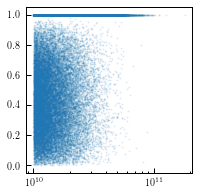

In [8]:
fig = plt.figure(figsize=(3.3,3.3))

# main panel
rect = 0.2, 0.2, 0.7, 0.7  # left, bottom, width, height
ax = fig.add_axes(rect)
ax.scatter(mock['luminosity'], e, s=1, alpha=0.1)
ax.set_xscale('log')
plt.show()

In [11]:
mock['quiescent']==False

array([False, False, False, ..., False,  True,  True])